In [3]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
ROOT_PATH = '/content/gdrive/My Drive/MLS/MLS Group Project/database/'

In [ ]:
os.getcwd()

'/content'

In [117]:
os.chdir(ROOT_PATH)
os.listdir()

['enterface database',
 'RAVDESS',
 'lpd_full',
 'features',
 'annotations',
 'MEMD_audio',
 'requirements_gpu.txt',
 'requirements_test.txt',
 '.travis.yml',
 '.gitignore',
 'README.md',
 'wavenet_params.json',
 'generate.py',
 'LICENSE',
 'images',
 'test',
 'ci',
 'wavenet',
 'MER_audio',
 'train.py',
 'logdir',
 'requirements.txt',
 'training_checkpoints',
 'MLS Group Project.ipynb',
 'output.mid']

In [6]:
!pip install -r "requirements.txt"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 352 kB 7.5 MB/s 


In [7]:
!pip install pyfluidsynth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!apt install fluidsynth

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth1 libqt5x11extras5 qsynth
Suggested packages:
  fluid-soundfont-gs timidity jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth1 libqt5x11extras5 qsynth
0 upgraded, 5 newly installed, 0 to remove and 11 not upgraded.
Need to get 120 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libfluidsynth1 amd64 1.1.9-1 [137 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluidsynth amd64 1.1.9-1 [20.7 kB]
Get:4 http://archive.ub

In [6]:
!fluidsynth --version

FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

FluidSynth 1.1.9


In [ ]:
!apt-get upgrade fluidsynth

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fluidsynth is already the newest version (1.1.9-1).
Calculating upgrade... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages have been kept back:
  libcudnn8 libcudnn8-dev libnccl-dev libnccl2
The following packages will be upgraded:
  binutils binutils-common binutils-x86-64-linux-gnu libbinutils
  linux-libc-dev login passwd
7 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Need to get 4,649 kB of archives.
After this operation, 12.3 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 login amd64 1:4.5-1ubuntu2.5 [307 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 passwd amd64 1:4.5-1ubuntu2.5 [818 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 binutils-x86-64-linux-gn

In [8]:
!apt-get update -qq && apt-get install -qq libfluidsynth1 fluid-soundfont-gm build-essential libasound2-dev libjack-dev

In [9]:
!pip install -qU pyfluidsynth pretty_midi

In [110]:
import collections
import datetime
import fluidsynth
from fluidsynth import *
#import pyfluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf
from google.colab import files
import random


from IPython import display
from matplotlib import pyplot as plt
from typing import Dict, List, Optional, Sequence, Tuple

In [11]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000

In [118]:
FOLDER_PATH = "MER_audio/Q2/"

In [119]:
files1=[os.path.join(ROOT_PATH, FOLDER_PATH) + i for i in os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH)) if i.endswith(".midi")]

In [120]:
files1

['/content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q2/AnyConv.com__MT0004558461.midi',
 '/content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q2/AnyConv.com__MT0000011357.midi',
 '/content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q2/AnyConv.com__MT0000729701.midi',
 '/content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q2/AnyConv.com__MT0000956340.midi',
 '/content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q2/AnyConv.com__MT0000732821.midi',
 '/content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q2/AnyConv.com__MT0000456939.midi',
 '/content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q2/AnyConv.com__MT0001927746.midi',
 '/content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q2/AnyConv.com__MT0002050671.midi',
 '/content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q2/AnyConv.com__MT0001975228.midi',
 '/content/gdrive/My Drive/MLS/MLS Group Project/database/MER_au

In [122]:
sample_file = files1[1]

In [124]:
sample_file

'/content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q2/AnyConv.com__MT0000011357.midi'

In [16]:
pm = pretty_midi.PrettyMIDI(sample_file)

In [17]:
waveform = pm.fluidsynth(fs=_SAMPLING_RATE)

In [18]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [19]:
display_audio(pm)

In [20]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 1
Instrument name: Acoustic Grand Piano


In [21]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=57, note_name=A3, duration=0.1290
1: pitch=45, note_name=A2, duration=0.0484
2: pitch=59, note_name=B3, duration=0.1129
3: pitch=64, note_name=E4, duration=0.1129
4: pitch=47, note_name=B2, duration=0.2419
5: pitch=68, note_name=G#4, duration=0.4516
6: pitch=56, note_name=G#3, duration=0.0806
7: pitch=57, note_name=A3, duration=0.0645
8: pitch=57, note_name=A3, duration=0.0484
9: pitch=64, note_name=E4, duration=0.3065


In [22]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [123]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

,pitch,start,end,step,duration
0,43,0.000000,0.595238,0.000000,0.595238
1,36,0.071429,0.261905,0.071429,0.190476
2,36,0.285714,0.357143,0.214286,0.071429
3,36,0.380952,0.547619,0.095238,0.166667
4,98,0.476190,0.571429,0.095238,0.095238


In [24]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['G#4', 'A3', 'A2', 'B3', 'B2', 'E4', 'G#3', 'C#3', 'A3', 'E4'],
      dtype='<U3')

In [25]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

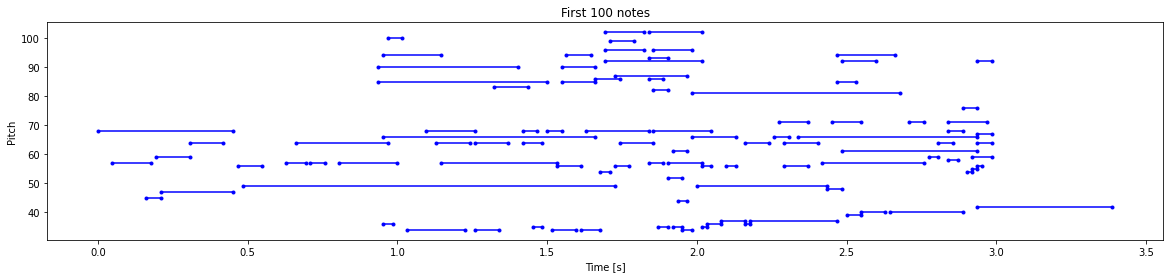

In [26]:
plot_piano_roll(raw_notes, count=100)

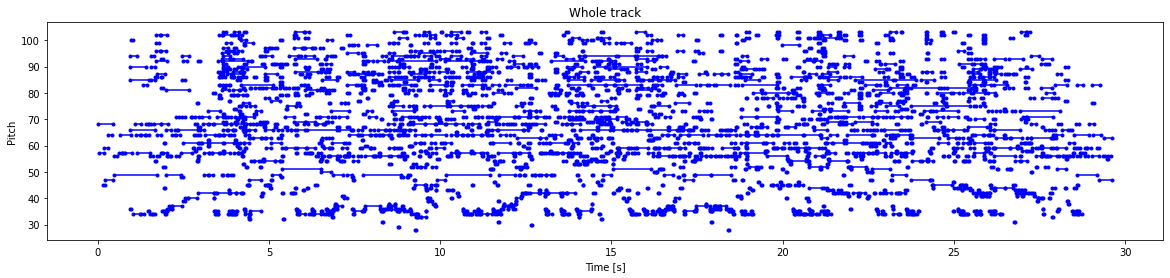

In [27]:
plot_piano_roll(raw_notes)

In [28]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

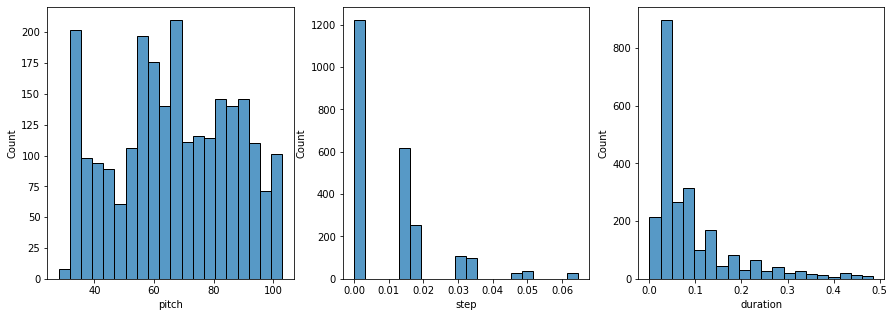

In [29]:
plot_distributions(raw_notes)

In [30]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str, 
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [87]:
num_files = len(files)
all_notes = []
for f in files:
  notes = midi_to_notes(f)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)

In [88]:
all_notes

,pitch,start,end,step,duration
0,57,0.000000,0.129032,0.000000,0.129032
1,78,0.000000,0.612903,0.000000,0.612903
2,52,0.048387,0.145161,0.048387,0.096774
3,33,0.080645,0.129032,0.032258,0.048387
4,45,0.080645,0.129032,0.000000,0.048387
...,...,...,...,...,...
4067,62,29.177419,29.258065,0.000000,0.080645
4068,49,29.193548,29.241935,0.016129,0.048387
4069,62,29.419355,29.500000,0.225806,0.080645
4070,54,29.483871,29.580645,0.064516,0.096774


In [89]:
n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)

Number of notes parsed: 186211


In [90]:
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)

In [91]:
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

In [92]:
def create_sequences(
    dataset: tf.data.Dataset, 
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [93]:
seq_length = 25
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

In [94]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)

sequence shape: (25, 3)
sequence elements (first 10): tf.Tensor(
[[0.4453125  0.         0.12903226]
 [0.609375   0.         0.61290323]
 [0.40625    0.0483871  0.09677419]
 [0.2578125  0.03225806 0.0483871 ]
 [0.3515625  0.         0.0483871 ]
 [0.515625   0.01612903 0.32258065]
 [0.5546875  0.01612903 0.0483871 ]
 [0.3828125  0.03225806 0.03225806]
 [0.4609375  0.         0.03225806]
 [0.484375   0.         0.14516129]], shape=(10, 3), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=91.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=0.14516129032258066>}


In [95]:
batch_size = 64
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

In [96]:
train_ds.element_spec

(TensorSpec(shape=(64, 25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(64,), dtype=tf.float64, name=None)})

In [97]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

In [98]:

def create_model():
  seq_length = 25
  input_shape = (seq_length, 3)
  learning_rate = 0.005

  inputs = tf.keras.Input(input_shape)
  x = tf.keras.layers.LSTM(128)(inputs)

  outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
  }
  model = tf.keras.Model(inputs, outputs)

  loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
  }

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer=optimizer,
  )

  return model


In [99]:
model = create_model()

In [100]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 25, 3)]      0           []                               
                                                                                                  
 lstm_2 (LSTM)                  (None, 128)          67584       ['input_3[0][0]']                
                                                                                                  
 duration (Dense)               (None, 1)            129         ['lstm_2[0][0]']                 
                                                                                                  
 pitch (Dense)                  (None, 128)          16512       ['lstm_2[0][0]']                 
                                                                                            

In [101]:
losses = model.evaluate(train_ds, return_dict=True)
losses

2909/2909 [==============================] - 29s 4ms/step - loss: 0.4883 - duration_loss: 0.2203 - pitch_loss: 4.8549 - step_loss: 0.0252


{'loss': 0.48827093839645386,
 'duration_loss': 0.22028586268424988,
 'pitch_loss': 4.854851245880127,
 'step_loss': 0.025243055075407028}

In [44]:
model.evaluate(train_ds, return_dict=True)

358/358 [==============================] - 2s 4ms/step - loss: 0.2798 - duration_loss: 0.0363 - pitch_loss: 4.8525 - step_loss: 9.3657e-04


{'loss': 0.27982431650161743,
 'duration_loss': 0.03626077622175217,
 'pitch_loss': 4.852539539337158,
 'step_loss': 0.0009365664445795119}

In [103]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/Q2/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [104]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/50
2909/2909 [==============================] - 23s 7ms/step - loss: 0.4327 - duration_loss: 0.2170 - pitch_loss: 4.2946 - step_loss: 0.0010
Epoch 2/50
2909/2909 [==============================] - 16s 6ms/step - loss: 0.4278 - duration_loss: 0.2153 - pitch_loss: 4.2443 - step_loss: 3.4604e-04
Epoch 3/50
2909/2909 [==============================] - 16s 6ms/step - loss: 0.4260 - duration_loss: 0.2140 - pitch_loss: 4.2327 - step_loss: 3.7080e-04
Epoch 4/50
2909/2909 [==============================] - 17s 6ms/step - loss: 0.4251 - duration_loss: 0.2135 - pitch_loss: 4.2241 - step_loss: 2.9769e-04
Epoch 5/50
2909/2909 [==============================] - 16s 5ms/step - loss: 0.4242 - duration_loss: 0.2131 - pitch_loss: 4.2165 - step_loss: 3.2889e-04
Epoch 6/50
2909/2909 [==============================] - 16s 6ms/step - loss: 0.4235 - duration_loss: 0.2123 - pitch_loss: 4.2153 - step_loss: 3.6651e-04
Epoch 7/50
2909/2909 [==============================] - 17s 6ms/step - loss: 0.4236 - 

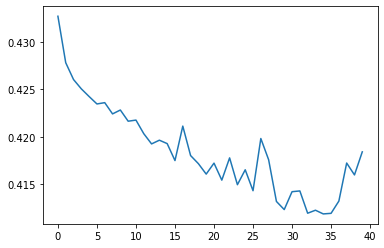

In [105]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

In [48]:
def predict_next_note(
    notes: np.ndarray, 
    keras_model: tf.keras.Model, 
    temperature: float = 1.0) -> int:
  """Generates a note IDs using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']

  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

In [77]:
def music_generation(raw_notes, model, num_predictions):
  temperature = 2.0
  #num_predictions = 120

  sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

  # The initial sequence of notes; pitch is normalized similar to training
  # sequences
  input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

  generated_notes = []
  prev_start = 0
  for _ in range(num_predictions):
    pitch, step, duration = predict_next_note(input_notes, model, temperature)
    start = prev_start + step
    end = start + duration
    input_note = (pitch, step, duration)
    generated_notes.append((*input_note, start, end))
    input_notes = np.delete(input_notes, 0, axis=0)
    input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
    prev_start = start

  generated_notes = pd.DataFrame(generated_notes, columns=(*key_order, 'start', 'end'))
  out_file = 'output.mid'
  out_pm = notes_to_midi(generated_notes, out_file=out_file, instrument_name=instrument_name)
  files.download(out_file)
  return out_pm


# Test Script

In [106]:
emotion = "disgust"

In [131]:
emotion_types = {"happy": "Q1", "surprise": "Q1", "angry": "Q2", "fearful": "Q2", "disgust": "Q2", "sad": "Q3", "calm": "Q4", "neutral": "Q4"}
folder_name = "MER_audio/" + emotion_types[emotion]

In [132]:
files1=[os.path.join(ROOT_PATH, folder_name) + "/" + i for i in os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH)) if i.endswith(".midi")]

In [133]:
random_number = random.randint(0, len(files1)-1)
sample_file = files1[random_number]

In [134]:
sample_file

'/content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q2/AnyConv.com__MT0001891229.midi'

In [135]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

,pitch,start,end,step,duration
0,28,0.000000,0.071429,0.000000,0.071429
1,47,0.023810,0.476190,0.023810,0.452381
2,52,0.095238,0.500000,0.071429,0.404762
3,28,0.142857,0.214286,0.047619,0.071429
4,28,0.285714,0.476190,0.142857,0.190476


In [136]:
model_checkpoint_path = "./training_checkpoints/" + emotion_types[emotion] + "/"
model_checkpoint_path

'./training_checkpoints/Q2/'

In [137]:
ckpt_path = tf.train.latest_checkpoint(model_checkpoint_path)

In [138]:
ckpt_path

'./training_checkpoints/Q2/ckpt_40'

In [139]:
model = create_model()

In [140]:
model.load_weights(ckpt_path)

In [141]:
num_predictions = 240

In [142]:
out_pm = music_generation(raw_notes, model, num_predictions)

1/1 [==============================] - 0s 15ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
type(out_pm)

NoneType

In [47]:

files.download(out_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from music21 import *
from pydub import AudioSegment
import glob

from __future__ import print_function

import argparse
from datetime import datetime
import json
import os
import sys
import time

import tensorflow as tf
#from tf.compat.v1 import *
#tf.disable_v2_behavior()
from tensorflow.python.client import timeline
import tf_slim as slim

from wavenet import WaveNetModel, AudioReader, optimizer_factory

from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras.callbacks import ModelCheckpoint

In [ ]:
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [ ]:
FOLDER_PATH = 'MER_audio/Q1/'

In [ ]:
os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH))

['AnyConv.com__MT0000249842.midi',
 'AnyConv.com__MT0000040632.midi',
 'AnyConv.com__MT0000082187.midi',
 'AnyConv.com__MT0000364027.midi',
 'AnyConv.com__MT0000414517.midi',
 'AnyConv.com__MT0000442827.midi',
 'AnyConv.com__MT0000540286.midi',
 'AnyConv.com__MT0000992846.midi',
 'AnyConv.com__MT0000392975.midi',
 'AnyConv.com__MT0000664362.midi']

In [ ]:
files=[i for i in os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH)) if i.endswith(".midi")]

#reading each midi file"
notes_array = np.array([read_midi(os.path.join(ROOT_PATH, FOLDER_PATH)+i) for i in files])

Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000249842.midi
Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000040632.midi
Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000082187.midi
Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000364027.midi
Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000414517.midi
Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000442827.midi
Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000540286.midi
Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000992846.midi
Loading Music File: /content/gdrive/My D

<ipython-input-16-f84d0b88f80b>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  notes_array = np.array([read_midi(os.path.join(ROOT_PATH, FOLDER_PATH)+i) for i in files])


In [ ]:
notes_array_obj = np.array([read_midi(os.path.join(ROOT_PATH, FOLDER_PATH)+i) for i in files], dtype=object)

Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000249842.midi
Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000040632.midi
Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000082187.midi
Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000364027.midi
Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000414517.midi
Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000442827.midi
Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000540286.midi
Loading Music File: /content/gdrive/My Drive/MLS/MLS Group Project/database/MER_audio/Q1/AnyConv.com__MT0000992846.midi
Loading Music File: /content/gdrive/My D

In [ ]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

923


(array([780.,  43.,  34.,  18.,  13.,  21.,   9.,   3.,   1.,   1.]),
 array([  1. ,  24.7,  48.4,  72.1,  95.8, 119.5, 143.2, 166.9, 190.6,
        214.3, 238. ]),
 <a list of 10 Patch objects>)

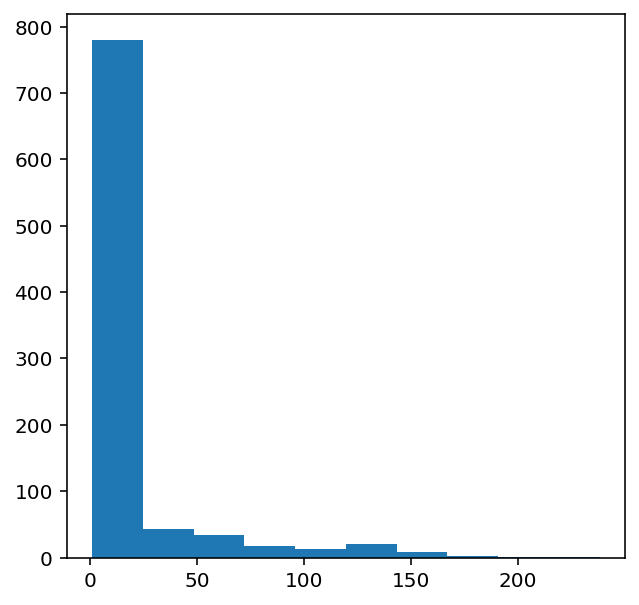

In [ ]:
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [ ]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))

98


In [ ]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

<ipython-input-21-2fa7923ce1b3>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_music = np.array(new_music)


In [ ]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [ ]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [ ]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [ ]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [ ]:
y_tr.shape

(7605,)

In [ ]:
def lstm():
  model = Sequential()
  model.add(LSTM(128,return_sequences=True))
  model.add(LSTM(128))
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(len(unique_y)))
  model.add(Activation('softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
  return model

In [ ]:
model = lstm()

In [ ]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [ ]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=1,epochs=50, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

ValueError: ignored

In [ ]:
files

[]

In [ ]:
BATCH_SIZE = 1
DATA_DIRECTORY = './MER_audio/Q1'
LOGDIR_ROOT = './logdir'
CHECKPOINT_EVERY = 100
NUM_STEPS = int(2000)
LEARNING_RATE = 0.01
WAVENET_PARAMS = './wavenet_params.json'
STARTED_DATESTRING = "{0:%Y-%m-%dT%H-%M-%S}".format(datetime.now())
SAMPLE_SIZE = 10000
L2_REGULARIZATION_STRENGTH = 0
SILENCE_THRESHOLD = 0.1
EPSILON = 0.001
MOMENTUM = 0.9
MAX_TO_KEEP = 5
METADATA = False

# Audio Files Input

In [52]:
emotion_types = {"happy": "Q1", "surprise": "Q1", "angry": "Q2", "fearful": "Q2", "disgust": "Q2", "sad": "Q3", "calm": "Q4"}
audio_files = {}
num_files = len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH)))

In [53]:
# Happy Pos val pos Arousal, sad Neg val neg Arou, angry NegValPosArousal, fearfulNegValPosArousal,disgustNegValPosArousal, surprise Pos val pos Arousal 

In [54]:
FOLDER_PATH = 'MER_audio/Q2'

In [55]:
files = os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH))

KeyboardInterrupt: ignored

In [ ]:
files

In [ ]:
for i in files:
  # print(os.path.splitext(i)[0])
  input_file = os.path.join(ROOT_PATH, FOLDER_PATH) + '/' + i
  output_file = os.path.splitext(i)[0] + '.wav'
  sound = AudioSegment.from_mp3(input_file)
  sound.export(os.path.join(ROOT_PATH, FOLDER_PATH) + '/' + output_file, format="wav")
  os.remove(input_file)

In [ ]:
os.path.join(ROOT_PATH, FOLDER_PATH) + '/*.mp3'

In [ ]:
PATH = os.path.join(ROOT_PATH, FOLDER_PATH) + '/'

In [ ]:
audio_wav_files = [PATH + f for f in os.listdir(PATH) if f.endswith('.wav')]

In [ ]:
audio_wav_files

# Model Building

In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(audio_wav_files), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           22500     
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

In [ ]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [ ]:
!python train.py --data_dir=MER_audio/Q1

Streaming output truncated to the last 5000 lines.
Storing checkpoint to ./logdir/train/2022-12-06T20-26-35 ... Done.
step 5201 - loss = 3.951, (0.929 sec/step)
step 5202 - loss = 3.294, (1.343 sec/step)
step 5203 - loss = 3.343, (1.334 sec/step)
step 5204 - loss = 3.435, (1.336 sec/step)
step 5205 - loss = 3.429, (1.332 sec/step)
step 5206 - loss = 3.266, (0.409 sec/step)
step 5207 - loss = 3.534, (1.333 sec/step)
step 5208 - loss = 3.304, (1.339 sec/step)
step 5209 - loss = 3.302, (1.339 sec/step)
step 5210 - loss = 3.571, (1.332 sec/step)
step 5211 - loss = 3.497, (0.739 sec/step)
step 5212 - loss = 3.881, (1.332 sec/step)
step 5213 - loss = 4.058, (1.332 sec/step)
step 5214 - loss = 4.062, (1.323 sec/step)
step 5215 - loss = 3.781, (1.330 sec/step)
step 5216 - loss = 4.033, (0.890 sec/step)
step 5217 - loss = 4.085, (1.326 sec/step)
step 5218 - loss = 4.053, (1.336 sec/step)
step 5219 - loss = 4.211, (1.333 sec/step)
step 5220 - loss = 4.072, (1.329 sec/step)
step 5221 - loss = 4.1

In [ ]:
arousal_annotations = pd.read_csv("./annotations/annotations averaged per song/dynamic (per second annotations)/arousal.csv")

In [ ]:
arousal_annotations[arousal_annotations["sample_623000ms"] == -0.056]

,song_id,sample_15000ms,sample_15500ms,sample_16000ms,sample_16500ms,sample_17000ms,sample_17500ms,sample_18000ms,sample_18500ms,sample_19000ms,...,sample_622000ms,sample_622500ms,sample_623000ms,sample_623500ms,sample_624000ms,sample_624500ms,sample_625000ms,sample_625500ms,sample_626000ms,sample_626500ms
1754,2011,-0.274,-0.272,-0.27,-0.27,-0.27,-0.274,-0.282,-0.284,-0.28,...,-0.05,-0.05,-0.056,-0.17,-0.236,-0.332,-0.37,-0.392,-0.39,-0.378


In [ ]:
arousal_annotations.dropna(axis=0, how='all')

,song_id,sample_15000ms,sample_15500ms,sample_16000ms,sample_16500ms,sample_17000ms,sample_17500ms,sample_18000ms,sample_18500ms,sample_19000ms,...,sample_622000ms,sample_622500ms,sample_623000ms,sample_623500ms,sample_624000ms,sample_624500ms,sample_625000ms,sample_625500ms,sample_626000ms,sample_626500ms
0,2,-0.109386,-0.114942,-1.164126e-01,-0.118613,-1.264569e-01,-0.133199,-0.136855,-0.144713,-0.138985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,-0.110846,-0.123973,-1.311026e-01,-0.135956,-1.407755e-01,-0.144664,-0.163118,-0.165218,-0.158858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0.222327,0.179446,1.783881e-01,0.184056,1.760421e-01,0.178720,0.176345,0.175793,0.176154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,-0.255613,-0.251579,-2.519577e-01,-0.251124,-2.507627e-01,-0.251957,-0.251957,-0.251957,-0.251957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,0.464234,0.460789,4.609907e-01,0.461046,4.572397e-01,0.465702,0.471809,0.469918,0.473377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,2054,-0.190000,-0.182000,-1.800000e-01,-0.158000,-1.560000e-01,-0.150000,-0.152000,-0.150000,-0.150000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,2055,-0.070000,-0.086000,-1.100000e-01,-0.072000,-6.200000e-02,-0.062000,-0.076000,-0.062000,-0.042000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1799,2056,-0.044000,-0.044000,-4.400000e-02,-0.044000,-4.200000e-02,-0.046000,-0.050000,-0.052000,-0.052000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1800,2057,0.413333,0.413333,4.116667e-01,0.410000,4.066667e-01,0.410000,0.401667,0.371667,0.340000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
arousal_annotations[arousal_annotations["song_id"] == 2]

,song_id,sample_15000ms,sample_15500ms,sample_16000ms,sample_16500ms,sample_17000ms,sample_17500ms,sample_18000ms,sample_18500ms,sample_19000ms,...,sample_622000ms,sample_622500ms,sample_623000ms,sample_623500ms,sample_624000ms,sample_624500ms,sample_625000ms,sample_625500ms,sample_626000ms,sample_626500ms
0,2,-0.109386,-0.114942,-0.116413,-0.118613,-0.126457,-0.133199,-0.136855,-0.144713,-0.138985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ReplicateError: ignored